In [75]:
from numpy import mean
from numpy import std
import seaborn as sns
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from sklearn.metrics import classification_report
from keras.layers import Permute, Reshape
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [64]:
features=list()
with open('HARDataset/features.txt') as feat:
    features=[l.split()[1] for l in feat.readlines()]
print("Number of features = {}".format(len(features)))
for f in features:
    print(f,end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

In [5]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [6]:
with open('C:/AI/UCI HAR Dataset/features.txt') as feat:
    features2=[l.split()[0] for l in feat.readlines()]
features2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [7]:
feat

<_io.TextIOWrapper name='C:/AI/UCI HAR Dataset/features.txt' mode='r' encoding='cp949'>

In [8]:
#Exploring Train Data
train = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/X_train/X_train.txt", delim_whitespace=True, header=None, encoding='latin-1')
train.columns = features
train['subject'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/subject_train.txt", header=None, squeeze=True)
train['Activity'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
train.sample()

C:\Users\procns\AppData\Local\Temp\ipykernel_19316\4255223286.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train['subject'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/subject_train.txt", header=None, squeeze=True)
C:\Users\procns\AppData\Local\Temp\ipykernel_19316\4255223286.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train['Activity'] = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6174,0.260857,-0.023053,-0.11241,-0.371526,-0.155127,-0.308935,-0.419607,-0.160607,-0.2927,0.118974,...,0.338919,0.397858,0.702073,0.327284,-0.701911,0.234502,0.176998,27,1,WALKING


In [9]:
pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", squeeze=True)

C:\Users\procns\AppData\Local\Temp\ipykernel_19316\1645433105.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/y_train.txt", squeeze=True)


0       5
1       5
2       5
3       5
4       5
       ..
7346    2
7347    2
7348    2
7349    2
7350    2
Name: 5, Length: 7351, dtype: int64

In [10]:
train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [11]:
train.shape

(7352, 564)

In [12]:
test = pd.read_csv("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/X_test/X_test.txt", delim_whitespace=True, header=None, encoding='latin-1')
test.columns = features
test['subject'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/subject_test.txt', header=None, squeeze=True)
test['Activity'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/y_test.txt', names=['Activity'], squeeze=True)
test['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
test.sample()

C:\Users\procns\AppData\Local\Temp\ipykernel_19316\211243177.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test['subject'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/subject_test.txt', header=None, squeeze=True)
C:\Users\procns\AppData\Local\Temp\ipykernel_19316\211243177.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test['Activity'] = pd.read_csv('C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/test/y_test.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2,0.275485,-0.02605,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.93926,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING


In [13]:
test.shape

(2947, 564)

In [14]:
format(sum(train.duplicated()))

'0'

In [15]:
sum(train.duplicated())

0

In [16]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7347    False
7348    False
7349    False
7350    False
7351    False
Length: 7352, dtype: bool

In [17]:
print('Duplicates in train = {}'.format(sum(train.duplicated())))
print('Duplicates in test = {}'.format(sum(test.duplicated())))
print('Invalid values in train = {}'.format(train.isnull().values.sum()))
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


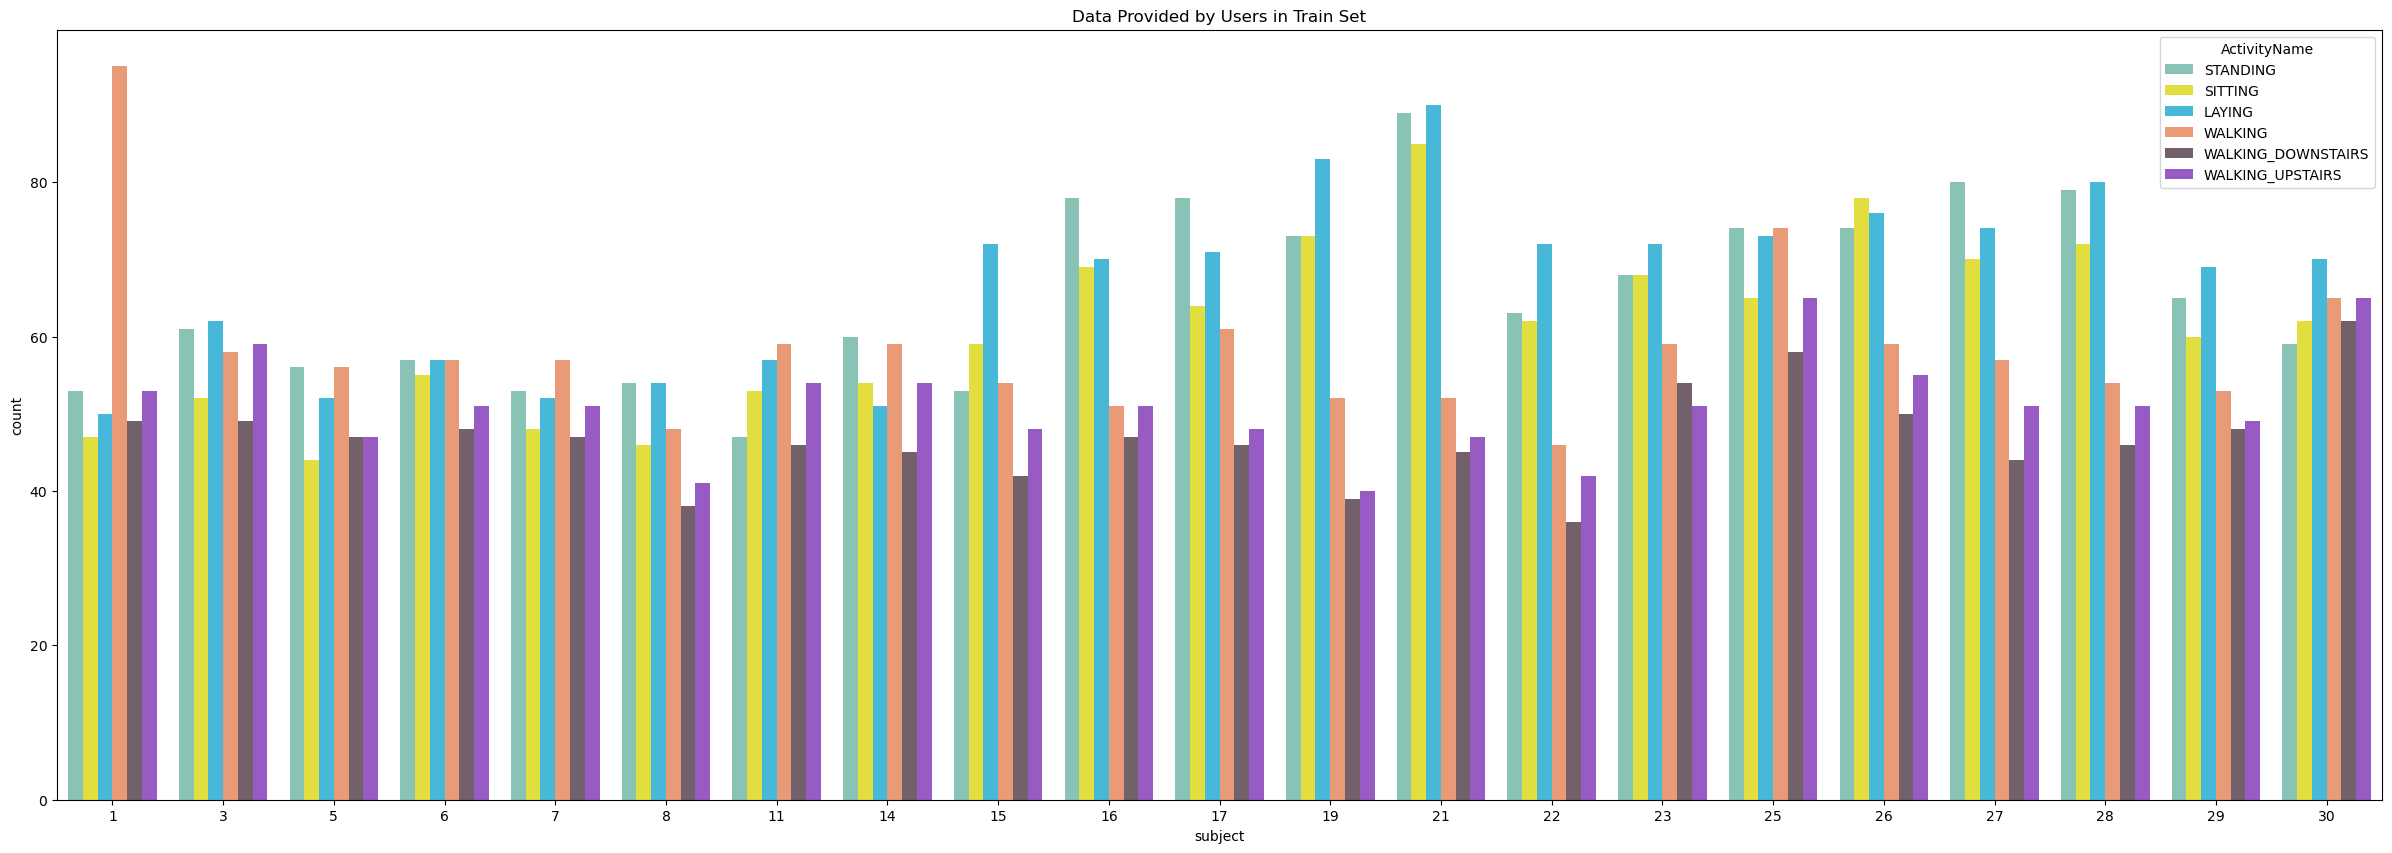

In [18]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = train)
pyplot.title('Data Provided by Users in Train Set')
pyplot.show()

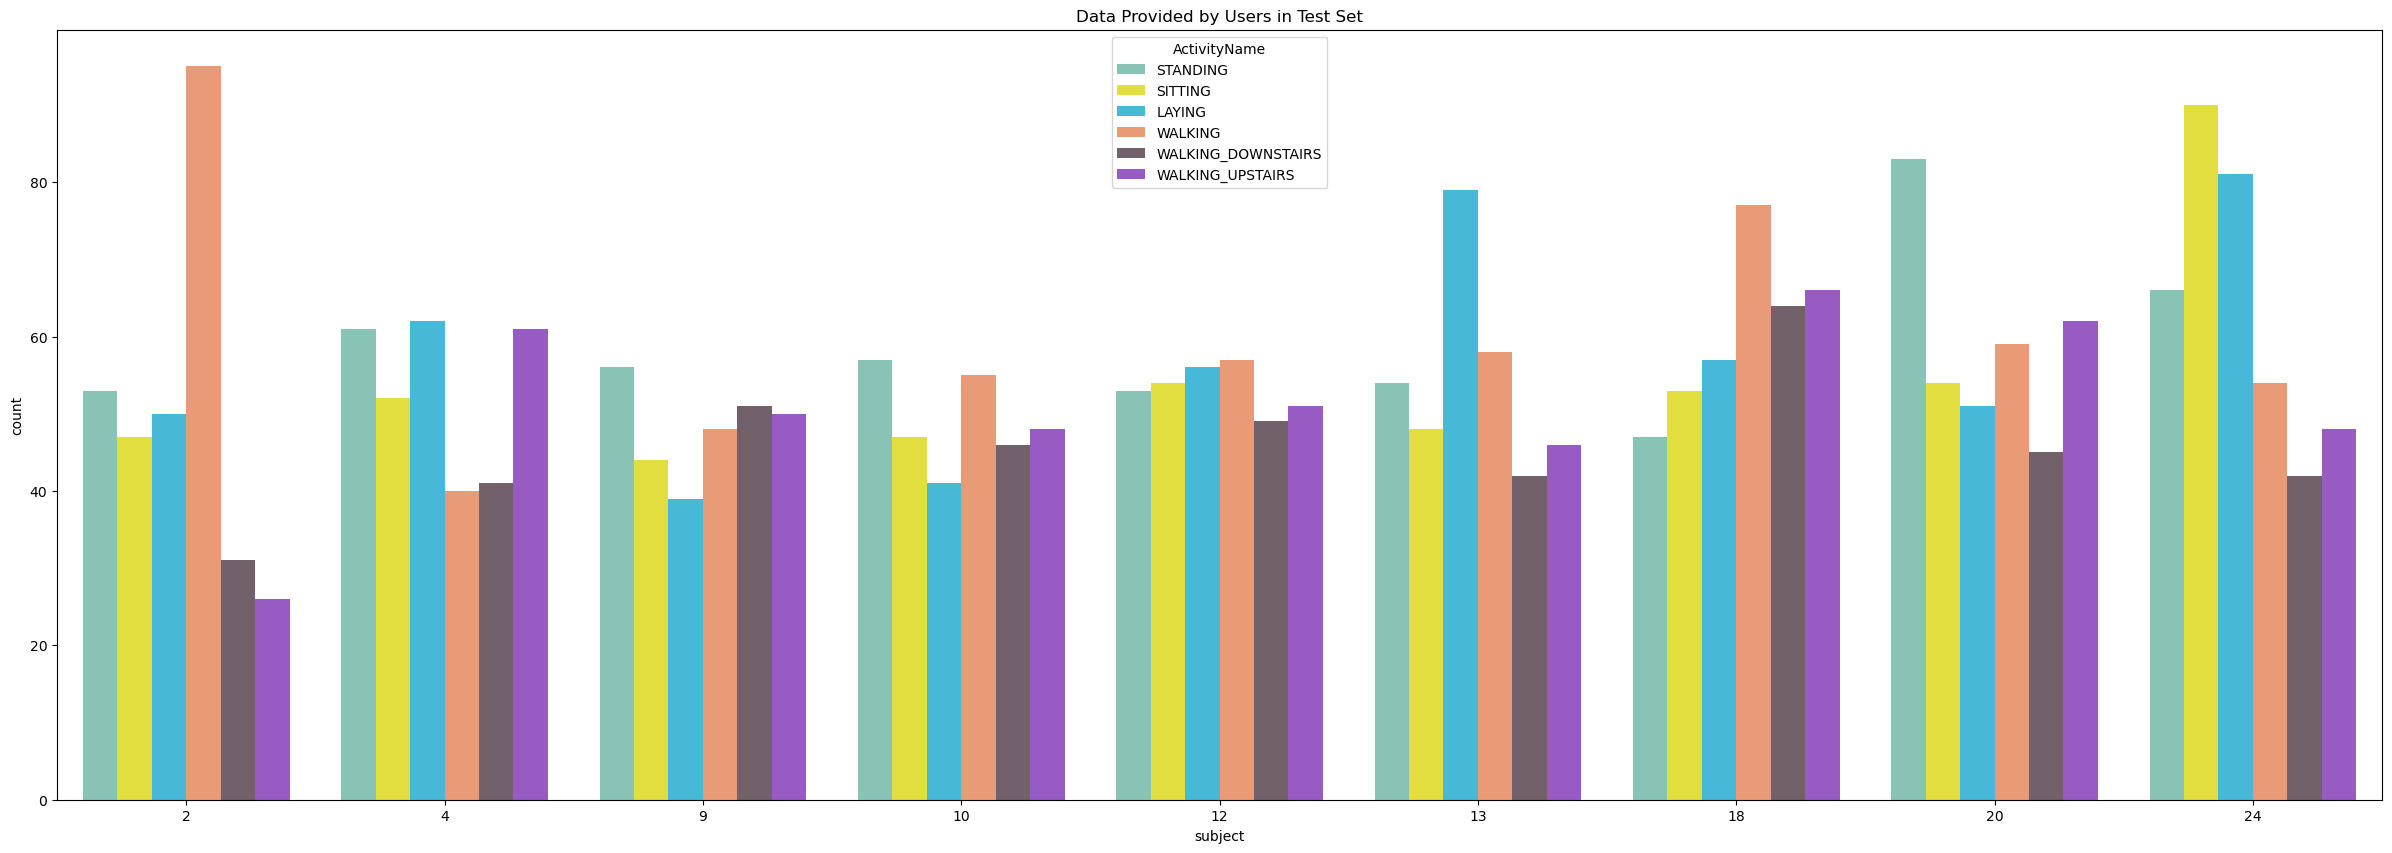

In [19]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = test)
pyplot.title('Data Provided by Users in Test Set')
pyplot.show()

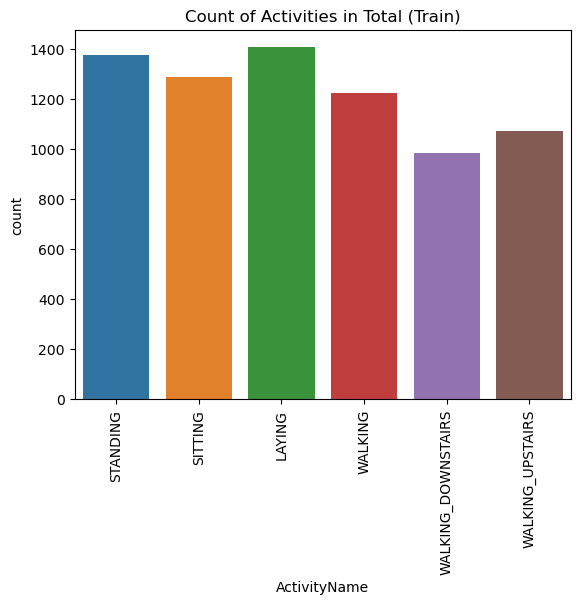

In [20]:
pyplot.title('Count of Activities in Total (Train)')
sns.countplot(x="ActivityName",data=train)
pyplot.xticks(rotation=90)
pyplot.show()

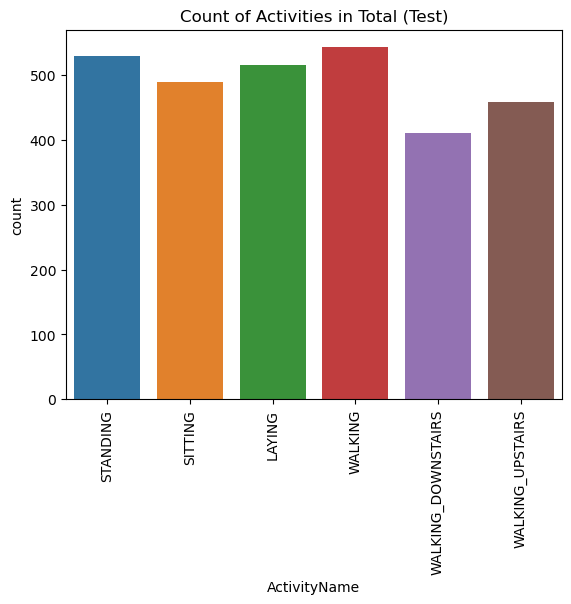

In [21]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",data=test)
pyplot.xticks(rotation=90)
pyplot.show()

In [22]:
#CNN-LSTM Model


In [60]:
def file_load(filepath):
    print('file_load filepath = {}'.format(filepath))
    df = read_csv(filepath, header=None, delim_whitespace=True)
    return df.values    

In [34]:
def train_test_append(filenames, append_before=''):
    print('train_test_append append_before = {}'.format(append_before))
    datalist = list()
    for name in filenames:
        data = file_load(append_before + name)
        datalist.append(data)
    datalist_np = np.array(datalist)
    print('-----before-----')
    print(datalist_np.shape)
    print(datalist_np)
    datalist = dstack(datalist)
    print("-----after------")
    print(datalist.shape)
    print(datalist)
    return datalist

In [35]:
def inertial_signals_load(group, append_before=''):
    print('inertial_signals_load append_before = {}'.format(append_before))
    filepath = append_before + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = train_test_append(filenames, filepath)
    y = file_load(append_before + group + '/y_'+group+'.txt')
    return X, y

In [65]:
def load_dataset(append_before=''):
    print('load_dataset append_before = {}'.format(append_before))
    trainX, trainy = inertial_signals_load('train', append_before + 'HARDataset/')
    testX, testy = inertial_signals_load('test', append_before + 'HARDataset/')
    print('---------before(y)----------')
    print(trainy.shape)
    trainy = trainy - 1
    testy = testy - 1
    print('---------after(y)-----------')
    print(trainy.shape)
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [61]:
trainX, trainy, testX, testy = load_dataset()
verbose, epochs, batch_size = 0, 10, 32
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 4
n_length = 32
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features)) 
print(trainX.shape,testX.shape)

load_dataset append_before = 
inertial_signals_load append_before = HARDataset/
train_test_append append_before = HARDataset/train/Inertial Signals/
file_load filepath = HARDataset/train/Inertial Signals/total_acc_x_train.txt
file_load filepath = HARDataset/train/Inertial Signals/total_acc_y_train.txt
file_load filepath = HARDataset/train/Inertial Signals/total_acc_z_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_acc_x_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_acc_y_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_acc_z_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_gyro_x_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_gyro_y_train.txt
file_load filepath = HARDataset/train/Inertial Signals/body_gyro_z_train.txt
-----before-----
(9, 7352, 128)
[[[ 1.012817e+00  1.022833e+00  1.022028e+00 ...  1.018445e+00
    1.019372e+00  1.021171e+00]
  [ 1.018851e+00  1.022380e+00  1.

file_load filepath = HARDataset/test/Inertial Signals/body_acc_x_test.txt
file_load filepath = HARDataset/test/Inertial Signals/body_acc_y_test.txt
file_load filepath = HARDataset/test/Inertial Signals/body_acc_z_test.txt
file_load filepath = HARDataset/test/Inertial Signals/body_gyro_x_test.txt
file_load filepath = HARDataset/test/Inertial Signals/body_gyro_y_test.txt
file_load filepath = HARDataset/test/Inertial Signals/body_gyro_z_test.txt
-----before-----
(9, 2947, 128)
[[[ 1.041216    1.041803    1.039086   ...  0.9930164   0.9932414
    0.9943906 ]
  [ 0.9991921   0.9946787   0.9935518  ...  1.001861    0.9975208
    0.9928615 ]
  [ 0.9975931   0.9989703   0.9970574  ...  0.9918802   0.9906626
    0.9882446 ]
  ...
  [ 0.8213505   0.7991996   0.8004623  ...  1.46317     1.179223
    0.8504963 ]
  [ 1.037668    0.8780725   0.8963897  ...  1.156389    1.243857
    1.323546  ]
  [ 0.7713622   0.9000949   0.8681034  ...  0.9188616   0.9494752
    0.9578348 ]]

 [[-0.2697959  -0.28002

In [66]:
#데이터 로드하는 과정 중 궁금한점

<function __main__.inertial_signals_load(group, append_before='')>

In [71]:
trainX.shape

(7352, 4, 32, 9)

In [69]:
inertial_signals_load

<function __main__.inertial_signals_load(group, append_before='')>

In [67]:
data_study = file_load("C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/Inertial Signals/body_acc_x_train.txt")
#data_study = np.array(data_study)
data_study.shape

file_load filepath = C:/Users/procns/Desktop/인공지능/UCI-HAR/HARDataset/train/Inertial Signals/body_acc_x_train.txt


(7352, 128)

In [70]:
#-------------------------------------------------------------#

In [68]:
df_test = read_csv('HARDataset/train/Inertial Signals/body_gyro_z_train.txt', header=None, delim_whitespace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.022859,0.010316,0.013250,0.017751,0.002553,0.007725,0.004325,0.010617,0.017189,0.010511,...,-0.006042,-0.006891,-0.004903,0.001354,0.008033,0.007355,0.002669,-0.002170,-0.005643,-0.001446
1,0.012268,0.016150,0.015895,0.012671,0.008774,0.005685,0.006093,0.008383,0.011140,0.012406,...,0.016544,0.018556,0.018173,0.018046,0.019393,0.018070,0.014628,0.005045,-0.004424,-0.002798
2,0.002159,-0.000272,0.002631,0.003376,0.000057,0.001268,-0.001209,-0.002290,0.000451,-0.000389,...,-0.003351,-0.002691,-0.000283,0.000404,-0.001556,-0.001239,-0.003032,-0.005566,-0.003702,-0.002645
3,-0.000873,-0.005482,-0.004678,-0.000221,0.001588,0.009021,0.020953,0.028212,0.028609,0.024456,...,-0.009409,-0.011208,-0.013223,-0.013121,-0.012114,-0.009983,-0.007534,-0.008408,-0.011158,-0.012987
4,-0.001574,0.000201,-0.000970,-0.000673,-0.000693,-0.002041,-0.000265,-0.000217,-0.001554,-0.000895,...,0.012295,0.009031,0.009103,0.005473,0.003101,0.000470,-0.006906,-0.004491,-0.003441,-0.010082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.456170,0.700776,0.997301,1.004445,0.722260,0.384807,0.080493,-0.179432,-0.397329,-0.459786,...,0.033305,0.041621,0.058743,0.135576,0.137811,0.068896,0.061847,0.105364,0.192774,0.251018
7348,0.453560,0.670788,0.676179,0.495978,0.281462,0.096833,0.036042,-0.002569,-0.148088,-0.354664,...,0.256055,0.227756,0.184920,0.193896,0.285813,0.311248,0.324083,0.319005,0.231496,0.234651
7349,0.300847,0.351178,0.272351,0.161631,0.092803,0.060685,0.138459,0.258722,0.418766,0.620477,...,0.433257,0.299354,0.181229,0.117206,0.122451,0.172516,0.201440,0.254344,0.281431,0.254206
7350,0.217504,0.158497,0.186879,0.192339,0.240986,0.281897,0.219482,0.228801,0.417526,0.721561,...,0.046540,-0.024443,-0.104694,-0.085842,-0.013465,0.083361,0.176435,0.176212,0.163561,0.188734


In [88]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 이부분에서 input_shape 를 n_step으로 하지 않고 none을 한 이유(n_step 이여도 작동함)
# trainX의 shape는 4차원으로 Conv1D를 사용하는 이유

In [86]:
#model = Sequential()
#model.add(TimeDistributed(Conv2D(filters=128, kernel_size=4, activation='relu'), input_shape=(None,n_steps,n_length,n_features)))
#model.add(TimeDistributed(MaxPooling2D(pool_size=2)))
#model.add(TimeDistributed(Conv2D(filters=128, kernel_size=4, activation='relu')))
#model.add(TimeDistributed(Dropout(0.5)))
#model.add(TimeDistributed(MaxPooling2D(pool_size=2)))
#model.add(TimeDistributed(Flatten()))
#model.add(LSTM(100))
#model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 이부분에서 input_shape 를 n_step으로 하지 않고 none을 한 이유(n_step 이여도 작동함)
# trainX의 shape는 4차원으로 Conv1D를 사용하는 이유

In [74]:
history=model.fit(trainX, trainy, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose)
loss , accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#print(model.summary()) 
score=accuracy*100
print('Accuracy = {}'.format(score))

Accuracy = 90.77027440071106


93/93 [==============================] - 1s 10ms/step


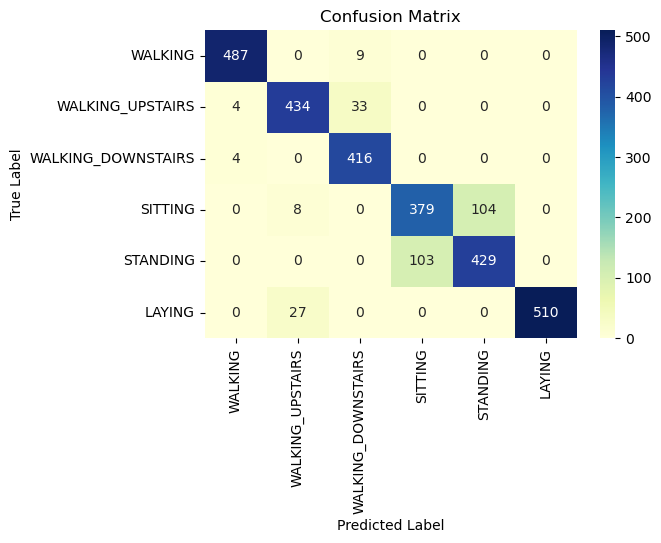

In [32]:
import matplotlib.pyplot as plt
ypred_train = model.predict(trainX)
max_ypred_train = np.argmax(ypred_train, axis=1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
ypred_test = model.predict(testX)
max_ypred_test = np.argmax(ypred_test, axis=1)
max_ytest = np.argmax(testy, axis=1)
matrix = metrics.confusion_matrix(max_ytest, max_ypred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [33]:
clr=metrics.classification_report(max_ytest, max_ypred_test)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       496
           1       0.93      0.92      0.92       471
           2       0.91      0.99      0.95       420
           3       0.79      0.77      0.78       491
           4       0.80      0.81      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947

